## Week 2: Recap
- Linear regression is a simple machine learning algorithm:
    - Task: predict a value for $y$ given $x$
    - Performance measure: $\textrm{MSE}_{\textrm{test}}$
    - Experience: minimize $\textrm{MSE}_{\textrm{test}}$ by solving the normal equations
- **Key point**: We fit the model by defining an **objective function** (aka **cost function**) and minimizing it. 
- **Key point**: Sometimes (as with simple linear regression), we can solve the optimization *analytically*. What if it can't be solved?

## Week 2: Recap
- Likelihood vs probability
    - $\mathcal{L}(\theta|X) = P(X|\theta)$
    - $P(X|\theta)$ -> "probability of observing $X$ given $\theta$"
    - $\mathcal{L}(\theta|X)$ -> "likelihood that parameters $\theta$ produced $X$"
- Log-likelihood maximization
    - We take the $\textrm{log}$ of the likelihood function for computational convenience
    - The parameters $\theta$ that maximize $\textrm{log}\mathcal{L}(\theta|X)$ are the model parameters that maximize the probability of observing the data
- **Key point**: The log-likelihood is a flexible cost function that is often used to find the best-fitting model parameters
- **Key point**: If the log-likelihood function is differentiable, we can analytically solve for maximum likelihood parameter estimates

## Week 3: Outline
- Logistic regression
    - Binary classification
    - Non-linearities/activation functions
    - MLE fitting w/ train and test sets
    - Comparison with scikit-learn

### Linear vs logistic regression
Linear regression takes a vector $x \in \mathbb{R}$ as an input and predict the value of a scalar $y \in \mathbb{R}$ as an output. 
$$\hat{y} = w^Tx$$
where $\hat{y}$ is the predicted value of $y$ and $w$ is a vector of parameters (aka weights). **The output $\hat{y}$ is any real number.**

What if we want to output categorical data, such as class membership?

### Linear vs logistic regression
**Example:** We want to predict whether or not a customer will complain given the number of minutes that our employee is late. 

<img src='./img/w3_minutes_late.png' width='500'  align="center">

This is known as **binary classification**, because there are only two different classes: $y = 1$ (complained) and $y=0$ (did not complain).

<img src='./img/w3_minutes_late_linear.png' width='800'  align="center">

Our output must therefore be in the range $0 \leq y \leq 1$. To "squish" the output of our linear model $\hat{y} = w^Tx$, we use the **sigmoid function**.

$$\sigma(z) = \frac{1}{1 + \textrm{exp}(-z)}$$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
## DO IT YOURSELF ##

def sigmoid(z):
    """function that computes the sigmoid transform of z"""
    
    return f

# plot the sigmoid function below

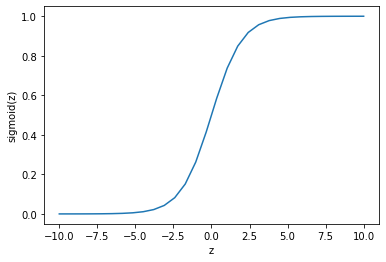

In [3]:
def sigmoid(z):
    """function that computes the sigmoid transform of z"""
    f = 1 / (1 + np.exp(-z))
    return f

z = np.linspace(-10, 10, 30)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)');

<img src='./img/w3_minutes_late_logistic.png' width='800'  align="center">

### Linear vs logistic regression
$$ \hat{y} = \frac{1}{{1 + \textrm{exp}(-w^Tx)}}$$

Note that our output is still a real number. Now that it is bounded between $0$ and $1$, we can interpret the value of $\hat{y}$ as the **probability that y = 1**.

$$p(y = 1 |x, w) = \sigma(w^Tx)$$

<img src='./img/w3_linear_vs_logistic.png' width='600'>

### Likelihood of a logistic regression model

In order to find the maximum likelihood estimate for parameters $w$, we need to frame the problem as probability density estimation. This means that we need to assume a probability distribution for the binary outcomes. 

### Bernoulli distribution
We can assume that each outcome $y$ is sampled from a Bernoulli distribution. The Bernoulli distribution has the following probability mass function:  

$$P(k | p) = p^k(1-p)^{(1-k)} \quad \textrm{for} \  k \in \{0,1\}$$  

where $p$ is the probability that $k=1$.

### Likelihood function
The Bernoulli pmf allows us to compute the probability of an outcome $y$ given $p$, and we previously said that the output of our logistic regression function $\hat{y} = \sigma(w^Tx)$ gives the probability of belonging to a class. Putting it all together:

$$P(y_i\ |\ \hat{y}_i) = \hat{y}_i^{y_i}(1 - \hat{y}_i)^{(1 - y_i)} $$

$$P(y_i\ | \ w, x_i) = \sigma(w^Tx_i)^{y_i}(1 - \sigma(w^Tx_i))^{(1 - y_i)} $$

$$\mathcal{L}(w\ |\ y_i, x_i) = \sigma(w^Tx_i)^{y_i}(1 - \sigma(w^Tx_i))^{(1 - y_i)}$$

Likelihood function for the full dataset $X = \{x_1, x_2,.. x_m\}$:

$$\mathcal{L}(w | X, y) = \prod_{i=1}^m\sigma(w^Tx_i)^{y_i}(1 - \sigma(w^Tx_i))^{(1 - y_i)}$$

Taking the log:
$$\textrm{log}\mathcal{L}(w | X, y) = \sum_{i=1}^my_i\textrm{log}(\sigma(w^Tx_i))\ +\ (1-y_i)\textrm{log}(1 - \sigma(w^Tx_i))$$

### Estimating our parameters
As we discussed last week, the maximum likelihood estimate for the parameters of our model ($w$) is given by:

$$\hat{w}_{\textrm{ML}} = \underset{\theta}{\operatorname{argmax}}log\mathcal{L}(w|X,y)$$
$$\hat{w}_{\textrm{ML}} = \underset{\theta}{\operatorname{argmin}}-log\mathcal{L}(w|X,y)$$

Unlike with previous models (linear regression & gaussian density estimation), we can't just take the gradient and solve for $\hat{w}$ analytically. We have to minimize our cost function $-log\mathcal{L}(w|X,y)$ numerically with an optimizer. 

### Load in the dataset
The dataset contains the two exam marks for 100 students, as well as a binary variable indicating whether or not each student was admitted to college. Borrowed from [Andrew Ng's ML course](https://www.coursera.org/learn/machine-learning).

In [4]:
url = 'https://raw.githubusercontent.com/BlohmLab/MLtutorials/week3/data/marks.txt'
data = pd.read_csv(url, header=None)
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1])

In [5]:
## DO IT YOURSELF ##

# get familiar with the dataset #

In [6]:
def plot_data(X,y):

    X_admitted = X[y==1,:]
    X_rejected = X[y==0,:]

    fig, ax = plt.subplots(1, 3, figsize=(18,5))

    ax[0].scatter(X_admitted[:,0],X_admitted[:,1])
    ax[0].scatter(X_rejected[:,0],X_rejected[:,1])
    ax[0].set_xlabel('Mark 1')
    ax[0].set_ylabel('Mark 2')
    ax[0].legend(('Accept','Reject'))

    ax[1].scatter(X[:,0],y)
    ax[1].set_xlabel('Mark 1')
    ax[1].set_ylabel('y')

    ax[2].scatter(X[:,1],y)
    ax[2].set_xlabel('Mark 2')
    ax[2].set_ylabel('y')

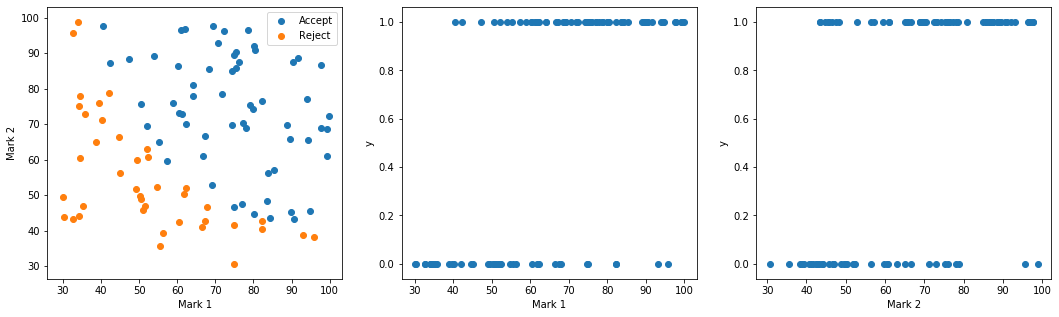

In [7]:
plot_data(X,y)

### We're missing something...
$X$ should have dimensions $[m\ \textrm{x}\ n]$, where $m$ = # observations (students) and $n$ = # features (or parameters).

In [8]:
print(X.shape)

(100, 2)


Our equation is: 
$$\hat{y}_i = \sigma(w^Tx_i) $$
$$\hat{y}_i = \sigma(x_{i,1}w_1 + x_{i,2}w_2) \quad \textrm{where}\ \{x_1,x_2\} = \{\textrm{Mark 1, Mark 2}\}$$

### We need to add an intercept!
We can do this by "padding" the X matrix with ones. 

In [9]:
X = np.c_[np.ones((X.shape[0], 1)), X]

Now our equation looks like this:
$$\hat{y}_i = \sigma(w_0 + x_{i,1}w_1 + x_{i,2}w_2)$$
And we have 3 parameters to fit: $w = \{w_0, w_1, w_2\}$

## Define the functions we need
$\hat{y} = \sigma(Xw)$

In [10]:
def compute_y_hat(x, w):
    """function that computes y_hat (aka probability that y=1)"""
    return y_hat

$-\textrm{log}\mathcal{L}(w | X, y) = -\sum_{i=1}^my_i\textrm{log}(\sigma(w^Tx_i))\ +\ (1-y_i)\textrm{log}(1 - \sigma(w^Tx_i))$

In [11]:
def compute_nll(x, y, w):
    """function that computes the negative log-likelihood 
    for parameters w, inputs x, and outcomes y"""
    return nll

$\hat{y} = \sigma(Xw)$

In [12]:
def compute_y_hat(x, w):
    """function that computes y_hat (aka probability that y=1)"""
    y_hat = sigmoid(np.dot(x,w))
    return y_hat

$-\textrm{log}\mathcal{L}(w | X, y) = -\sum_{i=1}^my_i\textrm{log}(\sigma(w^Tx_i))\ +\ (1-y_i)\textrm{log}(1 - \sigma(w^Tx_i))$

In [13]:
def compute_nll(x, y, w):
    """function that computes the negative log-likelihood 
    for parameters w, inputs x, and outcomes y"""
    y_hat = compute_y_hat(x, w)   
    nll = -np.sum(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat))
    return nll

In [14]:
# w = np.array([0,0,0])
w = np.array([0,2,0])

In [15]:
compute_nll(X, y, w)

/Users/benc/envs/ml_tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/benc/envs/ml_tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


nan

Problem! Some values of $w$ will cause the -log-likelihood to be undefined. Why?

This is because our sigmoid function is outputting $1$s and $0$s.

In [16]:
compute_y_hat(X, w)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
sigmoid(400)

1.0

One way around this is to ensure that no values of $\hat{y}$ ever reach $0$ or $1$. 

In [18]:
def compute_nll(x, y, w):
    """function that computes the negative log-likelihood 
    for parameters w, inputs x, and outcomes y"""
    y_hat = compute_y_hat(x, w)
    
    # prevent divide by 0
    eps = np.finfo(np.float32).eps
    y_hat[y_hat==1] -= eps
    y_hat[y_hat==0] += eps
    
    nll = -np.sum(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat))
    return nll

In [19]:
compute_nll(X, y, w)

637.6954132677076

### We're ready to optimize our cost function
We're going to use `scipy.optimize.minimize` today, but there are many many options.

In [20]:
from scipy.optimize import minimize

We need to specify an initial value for $w$:

In [21]:
w0 = np.array([0, 0, 0])

And define a new version of our -log-likelihood that is only a function of $w$:

In [22]:
fun = lambda w: compute_nll(X, y, w)

Now let's pass these arguments to `minimize`:

In [23]:
result = minimize(fun, w0)

In [24]:
print(result)

      fun: 20.349770159069518
 hess_inv: array([[ 0.00173118, -0.00086998,  0.00071955],
       [-0.00086998,  0.00081128, -0.00068237],
       [ 0.00071955, -0.00068237,  0.00061213]])
      jac: array([2.38418579e-07, 1.81198120e-05, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 22
     njev: 69
   status: 2
  success: False
        x: array([-25.16124195,   0.20623098,   0.20147085])


### Putting it all together
We don't want to test our model on the same data that we trained it with. Create a function that performs the minimization and returns $\hat{w}_{\textrm{MLE}}$ so that we can try it out with different training sets.

In [25]:
def find_w_mle(X_train, y_train, w0):
    """function that performs -log-likelihood minimization
    and returns w_mle"""
    
    return w_mle

In [26]:
def find_w_mle(X_train, y_train, w0=np.zeros((3,1))):
    """function that performs -log-likelihood minimization
    given X_train and y_train and returns w_mle"""
    
    fun = lambda w: compute_nll(X, y, w)
    result = minimize(fun, w0)
    w_mle = result['x']
    
    return w_mle

In [27]:
w_mle = find_w_mle(X, y)
w_mle

array([-25.16124195,   0.20623098,   0.20147085])

Now let's split our data into train and test sets:

In [36]:
def split_train_test(x, y, n_train):
    n_train = 50
    n_test = X.shape[0] - n_train

    X_train = X[:n_train,:]
    y_train = y[:n_train]

    X_test = X[n_train:,:]
    y_test = y[n_train:]
    
    return X_train, y_train, X_test, y_test

Finally, let's define two more functions. The first uses $\hat{w}_{\textrm{MLE}}$ to predict the class $y$:

In [29]:
def predict_class(x, w):
    """function that computes y_hat for all x and returns class labels"""
    
    return y_predicted

In [30]:
def predict_class(x, w):
    """function that computes y_hat for all x and returns class labels"""
    
    y_hat = compute_y_hat(x, w)
    y_predicted = y_hat > 0.5
    
    return y_predicted

The second compares the predicted classes $y$ to the true values and calculates accuracy:

In [31]:
def compute_accuracy(x, y, w):
    """function that compares predicted y to true y and returns accuracy"""

    return accuracy

In [32]:
def compute_accuracy(x, y, w):
    """function that compares predicted y to true y and returns accuracy"""
    y_predicted = predict_class(x, w)
    accuracy = np.sum(y_predicted == y)/100
    
    return accuracy

### Accuracy on the entire dataset

In [33]:
compute_accuracy(X, y, w_mle)

0.89

### With separate train/test sets

In [57]:
n_train = 80
X_train, y_train, X_test, y_test = split_train_test(X, y, n_train)

In [38]:
w_mle = find_w_mle(X_train, y_train)
compute_accuracy(X_test, y_test, w_mle)

0.46

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

print('Accuracy on full dataset: %f ' %accuracy)

Accuracy on full dataset: 0.910000 


/Users/benc/envs/ml_tutorial/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
parameters = model.coef_

print('Accuracy on test set: %f ' %accuracy)

Accuracy on test set: 0.920000 


/Users/benc/envs/ml_tutorial/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
